In [1]:
import sklearn
import pandas as pd
import torch
import numpy as np

In [119]:
data = pd.read_csv("lish_moa_annotated.csv")

/Users/vishvak/miniconda3/envs/pytorch/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3550: DtypeWarning:

Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.



In [120]:
data = data[data.training]

In [121]:
relevant_drugs = data.drug_id.value_counts().index[data.drug_id.value_counts() > 100]

In [122]:
len(relevant_drugs)

9

In [123]:
data = data[data.drug_id.isin(relevant_drugs)]

In [124]:
X = data[data.columns[data.columns.str.contains("g-")].to_list() + data.columns[data.columns.str.contains("c-")].to_list()]

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [113]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [114]:
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X_scaled)


In [115]:
X_pca = pd.DataFrame(X_pca, columns=[f"pca_{i}" for i in range(30)])

In [116]:
X_pca["drug_id"] = data["drug_id"]
X_pca["cp_type"] = data["cp_type"]
X_pca["cp_time"] = data["cp_time"]
X_pca["cp_dose"] = data["cp_dose"]


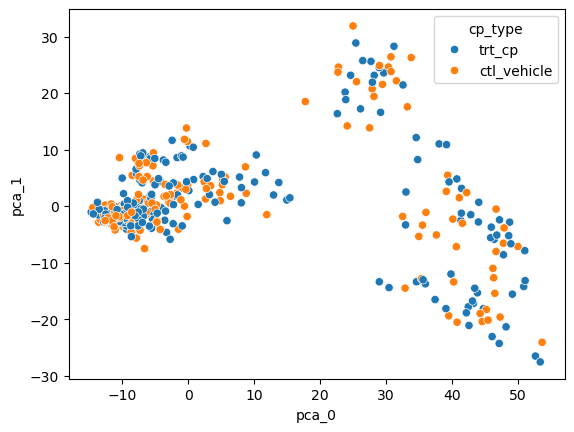

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="pca_0", y="pca_1", data=X_pca, hue="cp_type")
plt.show()


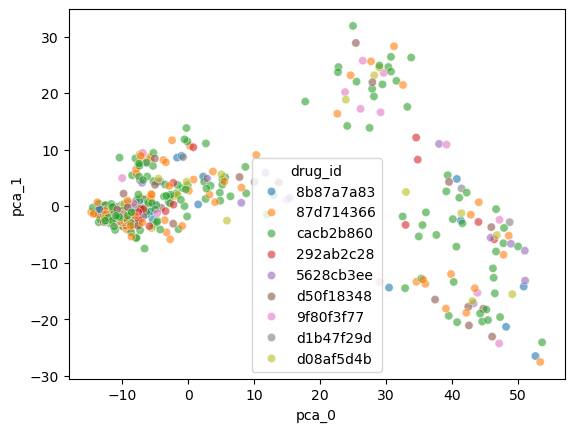

In [14]:

sns.scatterplot(x="pca_0", y="pca_1", data=X_pca, hue="drug_id",alpha=0.6)
plt.show()


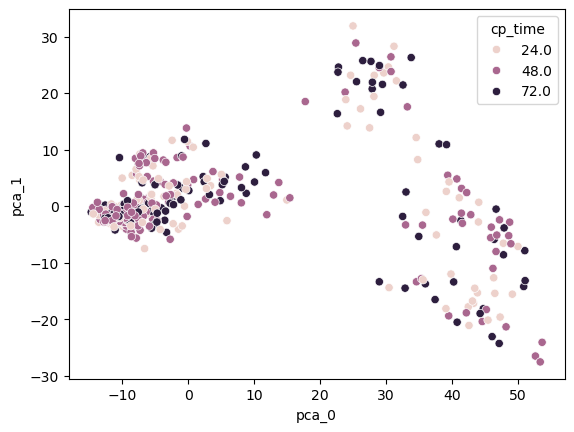

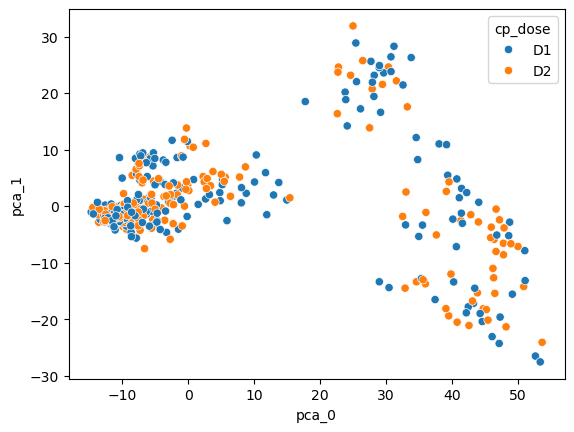

In [15]:

sns.scatterplot(x="pca_0", y="pca_1", data=X_pca, hue="cp_time")
plt.show()
sns.scatterplot(x="pca_0", y="pca_1", data=X_pca, hue="cp_dose")
plt.show()

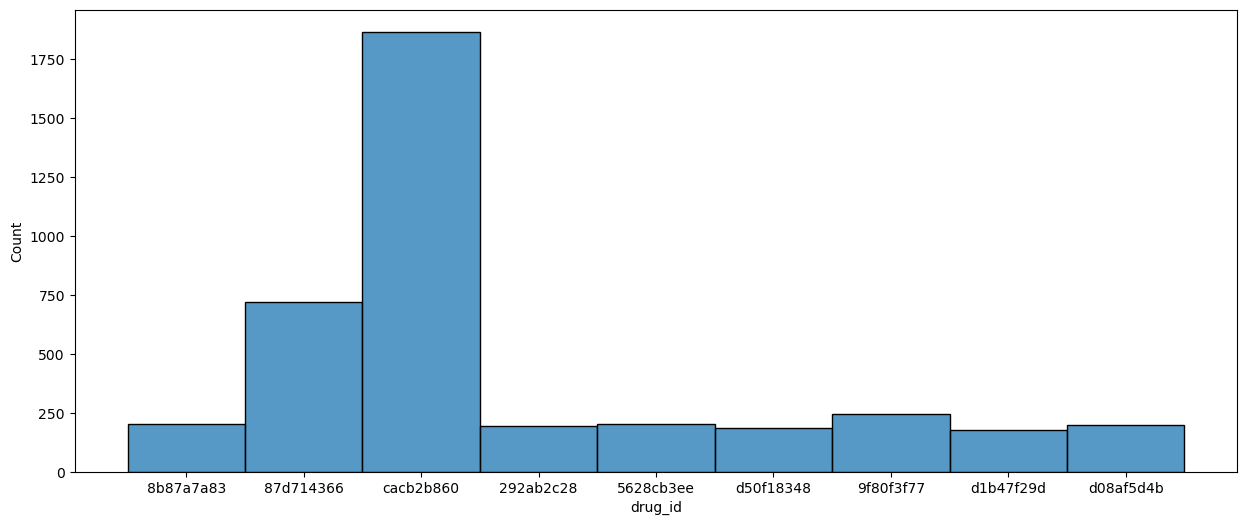

In [16]:
data["drug_id"].value_counts()
#plot histogram
plt.figure(figsize=(15, 6))
sns.histplot(data["drug_id"])
plt.show()

Text(0, 0.5, 'Explained Variance (%)')

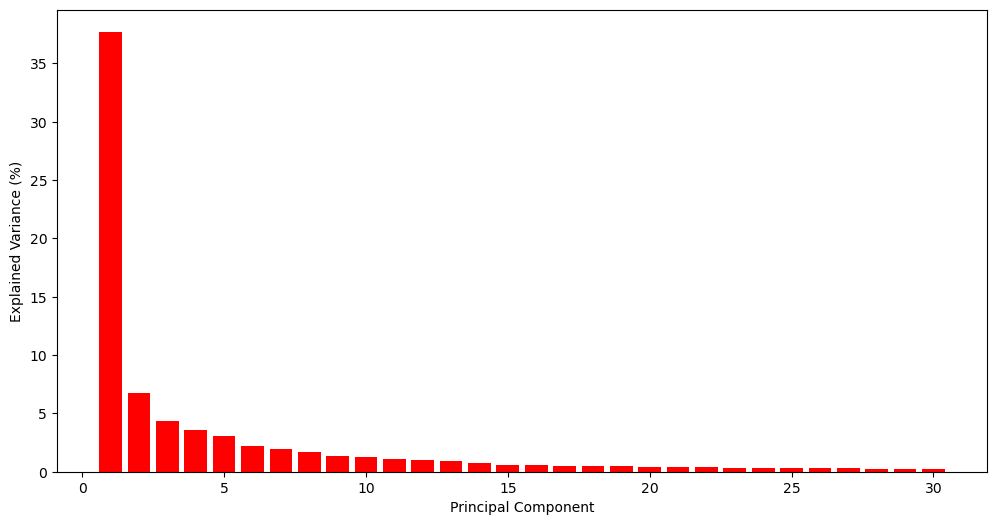

In [17]:
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_ * 100, color='red')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')

In [18]:
X.columns[1]

'g-ABCF1_23'

In [19]:
loadings_pc1 = pca.components_[0]

# Optionally, show as a DataFrame if you have feature names
feature_names = [X.columns[i] for i in range(X.shape[1])]
loadings_df = pd.DataFrame(loadings_pc1, index=feature_names, columns=['PC1 Loadings'])

print(loadings_df)

                                             PC1 Loadings
g-AARS1_16                                       0.045147
g-ABCF1_23                                       0.007144
g-ABL1_25                                        0.021365
g-ACAA1_30                                       0.005247
g-ACLY_47                                        0.033812
...                                                   ...
c-96-SKMES1_LUNG                                -0.053134
c-97-HCC56_LARGE_INTESTINE                      -0.052888
c-98-A204_SOFT_TISSUE                           -0.051960
c-99-OUMS23_LARGE_INTESTINE                     -0.051508
sars_coronavirus_3c-like_protease_inhibitor     -0.000000

[873 rows x 1 columns]


In [20]:
loadings_df.sort_values(by="PC1 Loadings", ascending=False)

,PC1 Loadings
g-PTK2B_2185,0.052167
g-SRC_6714,0.052027
g-TESK1_7016,0.051786
g-ST3GAL5_8869,0.051776
g-IPO13_9670,0.051230
...,...
c-8-KP4_PANCREAS,-0.053475
c-85-LS180_LARGE_INTESTINE,-0.053482
c-75-HEC151_ENDOMETRIUM,-0.053510
c-72-VMRCRCW_KIDNEY,-0.053590


/var/folders/l1/pdp_3vpn4vbcr6wh_r77d35c0000gn/T/ipykernel_82763/181649743.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


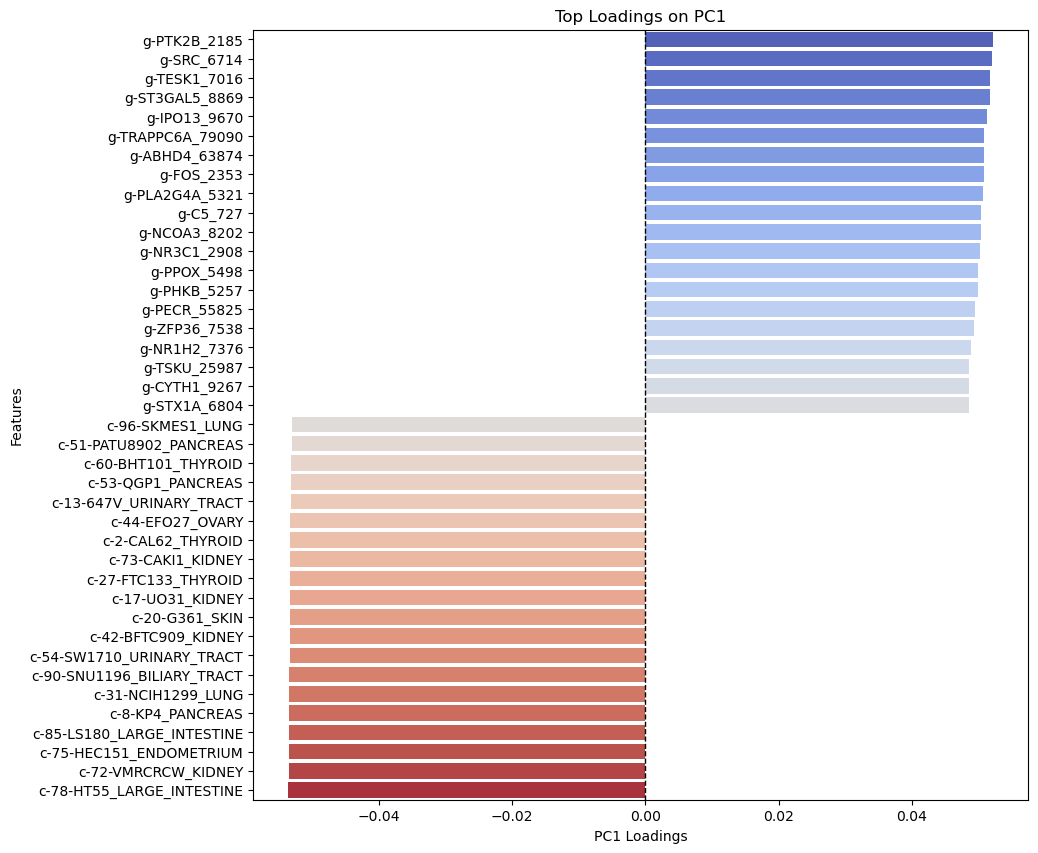

In [21]:
sorted_loadings = loadings_df.sort_values(by="PC1 Loadings", ascending=False)

# Select top 10 and bottom 10
top_10 = sorted_loadings.head(20)
bottom_10 = sorted_loadings.tail(20)

# Combine them
top_bottom_loadings = pd.concat([top_10, bottom_10])

# Plot
plt.figure(figsize=(10, 10))
sns.barplot(
    y=top_bottom_loadings.index, 
    x=top_bottom_loadings["PC1 Loadings"], 
    palette="coolwarm"
)
plt.axvline(0, color="black", linewidth=1, linestyle="--")  # Reference line at 0
plt.xlabel("PC1 Loadings")
plt.ylabel("Features")
plt.title("Top Loadings on PC1")
plt.show()

In [22]:
X

,g-AARS1_16,g-ABCF1_23,g-ABL1_25,g-ACAA1_30,g-ACLY_47,g-ADAM10_102,g-ADH5_128,g-PARP1_142,g-ADRB2_154,g-AGL_178,...,c-91-SNU449_LIVER,c-92-TE9_OESOPHAGUS,c-93-ABC1_LUNG,c-94-NCIH1373_LUNG,c-95-EBC1_LUNG,c-96-SKMES1_LUNG,c-97-HCC56_LARGE_INTESTINE,c-98-A204_SOFT_TISSUE,c-99-OUMS23_LARGE_INTESTINE,sars_coronavirus_3c-like_protease_inhibitor
7,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,0.4881,1.4750,...,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260,0.0
16,8.7380,0.1914,2.4380,-0.2930,3.2010,1.4910,5.3920,-1.0420,-8.4860,-2.5790,...,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-6.7840,0.0
25,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,...,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050,0.0
38,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,...,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820,0.0
39,1.6310,-2.1430,-0.0943,-1.1990,0.4869,-0.0935,1.2090,-3.8910,-1.5450,-2.2870,...,-5.7720,-1.9360,-2.8860,-2.7680,-2.4840,-2.7020,-2.2530,-4.8360,-0.6461,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23793,0.6008,0.2781,-0.3319,-0.8782,0.9281,0.7535,0.5971,1.6350,-0.3146,0.4984,...,0.9569,-0.2065,-0.4918,0.7863,0.0504,0.8813,0.7757,-0.5272,0.7082,0.0
23802,3.2890,2.1270,0.9770,2.0490,2.3170,-0.5355,-0.6357,-6.9060,-4.4830,-2.8400,...,-8.1490,-6.2900,-8.0970,-8.7330,-2.3780,-8.4480,-4.4550,-5.7930,-3.7000,0.0
23805,1.7380,-1.2900,-0.4533,-1.1640,-0.4841,-0.2392,-0.1774,-1.3980,-0.4059,0.1553,...,0.5974,-0.2727,0.1188,1.0770,-1.0250,0.1516,0.4503,-0.6312,-0.8302,0.0
23811,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,...,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808,0.0


In [23]:
# Split X into two datasets, with g- and c- features
X_g = X.loc[:, X.columns.str.contains("g-")]
X_c = X.loc[:, X.columns.str.contains("c-")]

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#split X_g and X_c into training and testing sets
X_g_train, X_g_test, y_train_g, y_test_g = train_test_split(X_g, data["drug_id"], test_size=0.3, random_state=42)
X_c_train, X_c_test, y_train_c, y_test_c = train_test_split(X_c, data["drug_id"], test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, data["drug_id"], test_size=0.3, random_state=42)


In [25]:
scaler = StandardScaler()
X_g_train_scaled = scaler.fit_transform(X_g_train)
X_g_test_scaled = scaler.transform(X_g_test)

X_c_train_scaled = scaler.fit_transform(X_c_train)
X_c_test_scaled = scaler.transform(X_c_test)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [26]:
logreg_g = LogisticRegression(solver="liblinear")
logreg_g.fit(X_g_train_scaled, y_train_g)
y_pred_g = logreg_g.predict(X_g_test_scaled)

logreg_c = LogisticRegression(solver="liblinear")
logreg_c.fit(X_c_train_scaled, y_train_c)
y_pred_c = logreg_c.predict(X_c_test_scaled)

logreg = LogisticRegression(solver="liblinear")
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)


In [27]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_g, y_pred_g)

0.9590643274853801

In [28]:
accuracy_score(y_test_c, y_pred_c)

0.9256474519632414

In [29]:
accuracy_score(y_test, y_pred)

0.9707602339181286

In [30]:
logreg = LogisticRegression(solver="liblinear", penalty="l1")
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
selected_features = np.where(logreg.coef_[0] != 0)[0]

In [31]:
accuracy_score(y_test, y_pred)

0.974937343358396

In [32]:
feature_names = X.columns

In [33]:
def plot_feature_importance(model, selected_features, title):
    coef = model.coef_[0][selected_features]  # Get nonzero coefficients
    selected_feature_names = feature_names[selected_features]  # Get corresponding feature names
    
    # Sort by absolute coefficient value
    sorted_idx = np.argsort(np.abs(coef))[::-1]
    sorted_features = selected_feature_names[sorted_idx]
    sorted_coefs = coef[sorted_idx]
    
    plt.figure(figsize=(15,10))
    plt.barh(sorted_features, sorted_coefs, color="skyblue")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature Name")
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()

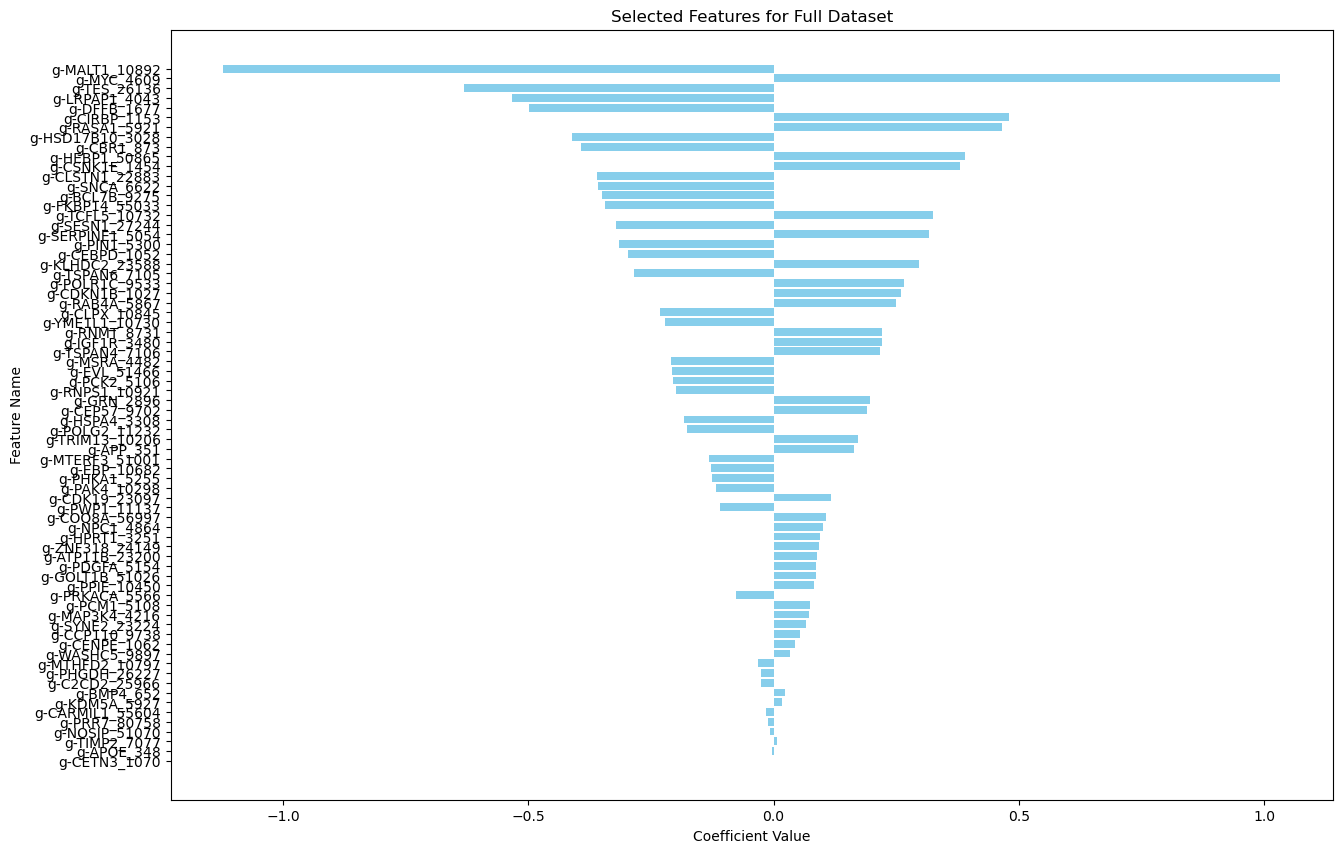

In [34]:
plot_feature_importance(logreg, selected_features, "Selected Features for Full Dataset")


Logistic Regression on PCA-transformed data - Accuracy: 0.8697
Explained variance by each principal component: [0.37361372 0.06706587 0.04432234 0.03509886 0.03057252 0.02223786
 0.02028438 0.0175228  0.01423863 0.01298708]


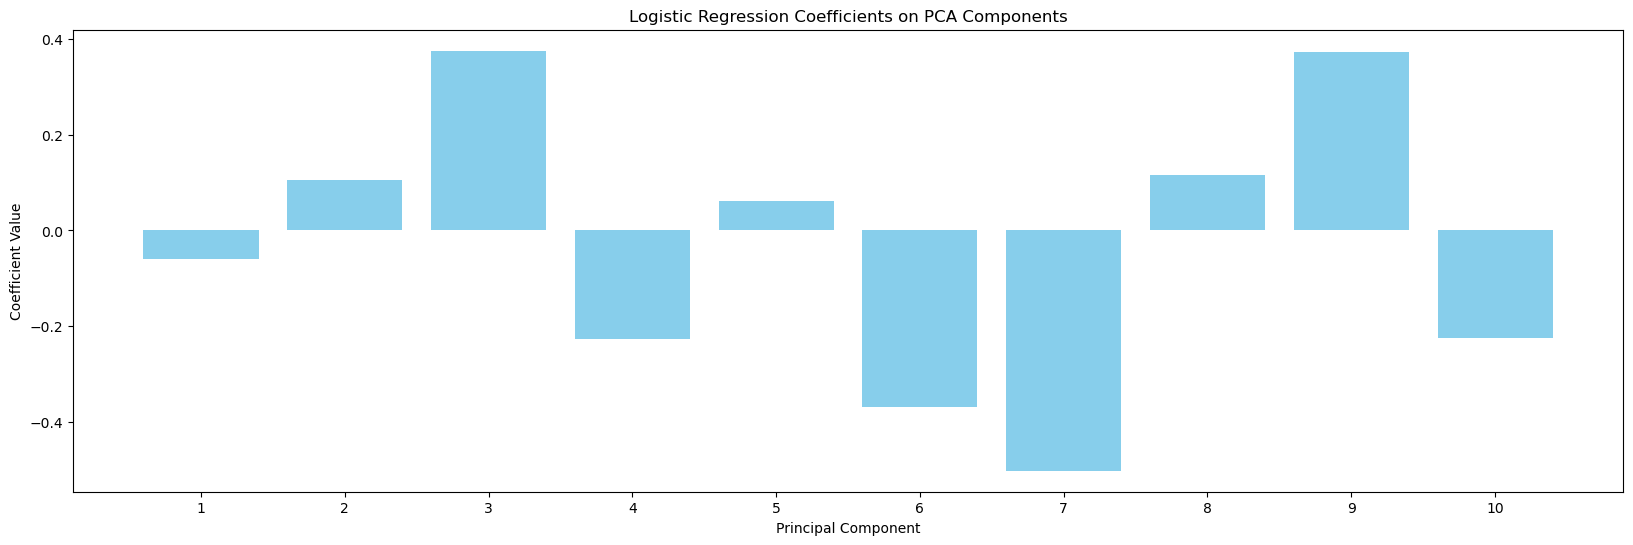

In [103]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the number of principal components to keep
# Define the number of principal components to keep
n_components = 10  # Adjust based on explained variance

# Standardize the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit PCA only on the training data
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform the test data using the fitted PCA
X_test_pca = pca.transform(X_test_scaled)

# Create and fit logistic regression model on PCA-transformed training data
logreg = LogisticRegression(solver="liblinear", penalty="l1")
logreg.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred_pca = logreg.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_pca)
print(f"Logistic Regression on PCA-transformed data - Accuracy: {accuracy:.4f}")

# Get the explained variance for each principal component
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each principal component: {explained_variance}")

# Get coefficients of logistic regression on the PCA components
pc_coefficients = logreg.coef_[0]

# Plot the coefficients for each principal component
plt.figure(figsize=(20, 6))
plt.bar(range(1, n_components + 1), pc_coefficients, color="skyblue")
plt.xlabel("Principal Component")
plt.ylabel("Coefficient Value")
plt.title("Logistic Regression Coefficients on PCA Components")
plt.xticks(range(1, n_components + 1))
plt.show()

In [104]:
top_pc_indices = np.argsort(np.abs(pc_coefficients))[-3:]  # Indices of top 3 PCs

# Transform both training and test data using PCA
X_pca_train = pca.transform(X_train)
X_pca_test = pca.transform(X_test)

# Extract the 3 most important PCs for plotting
pc1, pc2, pc3 = top_pc_indices
X_train_plot = X_pca_train[:, [pc1, pc2, pc3]]
X_test_plot = X_pca_test[:, [pc1, pc2, pc3]]

/Users/vishvak/miniconda3/envs/pytorch/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning:

X has feature names, but PCA was fitted without feature names

/Users/vishvak/miniconda3/envs/pytorch/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning:

X has feature names, but PCA was fitted without feature names



In [105]:
from sklearn.preprocessing import LabelEncoder
from plotly import express as px
label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train)
y_test_numeric = label_encoder.transform(y_test)

# Create DataFrame for train and test data
train_data = pd.DataFrame(X_train_plot, columns=[f"PC{pc1+1}", f"PC{pc2+1}", f"PC{pc3+1}"])
train_data['drug'] = y_train_numeric  # Assuming drug labels are in y_train

test_data = pd.DataFrame(X_test_plot, columns=[f"PC{pc1+1}", f"PC{pc2+1}", f"PC{pc3+1}"])
test_data['drug'] = y_test_numeric  # Assuming drug labels are in y_test

# Add a column to indicate whether the data is from train or test set
train_data['set'] = 'Train'
test_data['set'] = 'Test'

# Concatenate train and test data
combined_data = pd.concat([train_data, test_data])

# Create an interactive 3D scatter plot with Plotly
fig = px.scatter_3d(combined_data, x=f"PC{pc1+1}", y=f"PC{pc2+1}", z=f"PC{pc3+1}",
                    color='drug', symbol='set', labels={'drug': 'Drug Class', 'set': 'Dataset'},
                    title="3D PCA Projection (Top 3 Important PCs)",
                    color_continuous_scale=None)

# Show the plot
fig.update_layout(
    width=1200, 
    height=800,

    scene=dict(
        xaxis_title="PC7",
        yaxis_title="PC9",
        zaxis_title="PC6"
    ),
    legend_title="Drug Category",
    legend=dict(
        title="Drug",
        x=0.8, y=0.9,
        bgcolor="rgba(255, 255, 255, 0.5)"
    )
)
fig.update_traces(marker=dict(line=dict(width=1, color='black')))

# Show the plot
fig.show()

In [125]:
#remove last column
X = X.iloc[:, :-1]

In [126]:
X

,g-AARS1_16,g-ABCF1_23,g-ABL1_25,g-ACAA1_30,g-ACLY_47,g-ADAM10_102,g-ADH5_128,g-PARP1_142,g-ADRB2_154,g-AGL_178,...,c-90-SNU1196_BILIARY_TRACT,c-91-SNU449_LIVER,c-92-TE9_OESOPHAGUS,c-93-ABC1_LUNG,c-94-NCIH1373_LUNG,c-95-EBC1_LUNG,c-96-SKMES1_LUNG,c-97-HCC56_LARGE_INTESTINE,c-98-A204_SOFT_TISSUE,c-99-OUMS23_LARGE_INTESTINE
7,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,0.4881,1.4750,...,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
16,8.7380,0.1914,2.4380,-0.2930,3.2010,1.4910,5.3920,-1.0420,-8.4860,-2.5790,...,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-6.7840
25,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,...,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,...,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
39,1.6310,-2.1430,-0.0943,-1.1990,0.4869,-0.0935,1.2090,-3.8910,-1.5450,-2.2870,...,-2.9240,-5.7720,-1.9360,-2.8860,-2.7680,-2.4840,-2.7020,-2.2530,-4.8360,-0.6461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23793,0.6008,0.2781,-0.3319,-0.8782,0.9281,0.7535,0.5971,1.6350,-0.3146,0.4984,...,1.2470,0.9569,-0.2065,-0.4918,0.7863,0.0504,0.8813,0.7757,-0.5272,0.7082
23802,3.2890,2.1270,0.9770,2.0490,2.3170,-0.5355,-0.6357,-6.9060,-4.4830,-2.8400,...,-8.6300,-8.1490,-6.2900,-8.0970,-8.7330,-2.3780,-8.4480,-4.4550,-5.7930,-3.7000
23805,1.7380,-1.2900,-0.4533,-1.1640,-0.4841,-0.2392,-0.1774,-1.3980,-0.4059,0.1553,...,0.2865,0.5974,-0.2727,0.1188,1.0770,-1.0250,0.1516,0.4503,-0.6312,-0.8302
23811,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808


In [127]:
from wj_autoencoders import Autoencoder
from ct_autoencoder import VariationalAutoencoder


In [128]:
# Create Dataloader of X
X_tensor = torch.tensor(X.values, dtype=torch.float32)
X_dataloader = torch.utils.data.DataLoader(X_tensor, batch_size=64, shuffle=False)



In [129]:


# Define the autoencoder model
input_dim = 872
hidden_dims = [512, 256, 128]  # Decreasing hidden layer sizes
latent_dim = 64  # Bottleneck dimension size

model = Autoencoder(input_dim, hidden_dims, latent_dim)
model_vae = VariationalAutoencoder(input_dim, [448], 24)



In [130]:
#load model checkpoint
model.load_state_dict(torch.load("best_simple_autoencoder_model.pt"))
model.eval()



Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=872, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=256, out_features=128, bias=True)
    (9): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=128, out_features=64, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=128, out_featu

In [131]:
d = torch.load("ct_vae_model/ct_vae_autoencoder.pth", weights_only=False)
model_state_dict = d["model_state_dict"]  
model_vae.load_state_dict(model_state_dict)

<All keys matched successfully>

In [132]:
embeddings = []
embeddings_vae = []
for batch in X_dataloader:
    # Get the latent representation of the input batch
    embeddings.append(model.get_latent(batch).detach().numpy())
    mu,_ = model_vae.encode(batch)
    embeddings_vae.append(mu.detach().numpy())
    

In [134]:
embeddings = np.concatenate(embeddings, axis=0)
embeddings_vae = np.concatenate(embeddings_vae, axis=0)

In [136]:
np.save("new_autoencoder_embeddings.npy", embeddings)
np.save("new_vae_embeddings.npy", embeddings_vae)